In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from flask import Flask, request, jsonify


In [7]:
df = pd.read_csv("family.csv")

In [10]:
print(df.head())


  Family ID       Member ID Transaction Date    Category  Amount  Income  \
0    FAM001  FAM001_Member1       10/07/2024      Travel  409.12  113810   
1    FAM001  FAM001_Member1       10/16/2024      Travel  270.91  113810   
2    FAM001  FAM001_Member1       10/17/2024   Groceries   91.10  113810   
3    FAM001  FAM001_Member1       10/25/2024  Healthcare  198.23  113810   
4    FAM001  FAM001_Member1       10/25/2024   Education  206.42  113810   

   Savings  Monthly Expenses  Loan Payments  Credit Card Spending  Dependents  \
0    20234              5781           2422                  2959           2   
1    20234              5781           2422                  2959           2   
2    20234              5781           2422                  2959           2   
3    20234              5781           2422                  2959           2   
4    20234              5781           2422                  2959           2   

   Financial Goals Met (%)  
0                       68 

In [18]:
df

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,10/07/2024,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,10/16/2024,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,10/17/2024,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,10/25/2024,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,10/25/2024,Education,206.42,113810,20234,5781,2422,2959,2,68
...,...,...,...,...,...,...,...,...,...,...,...,...
16301,FAM200,FAM200_Member6,10/10/2024,Groceries,79.99,44621,44081,4296,2470,2831,4,92
16302,FAM200,FAM200_Member6,10/22/2024,Education,228.39,44621,44081,4296,2470,2831,4,92
16303,FAM200,FAM200_Member6,10/29/2024,Travel,258.63,44621,44081,4296,2470,2831,4,92
16304,FAM200,FAM200_Member6,10/26/2024,Travel,467.46,44621,44081,4296,2470,2831,4,92


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Family ID                16306 non-null  object 
 1   Member ID                16306 non-null  object 
 2   Transaction Date         16306 non-null  object 
 3   Category                 16306 non-null  object 
 4   Amount                   16306 non-null  float64
 5   Income                   16306 non-null  int64  
 6   Savings                  16306 non-null  int64  
 7   Monthly Expenses         16306 non-null  int64  
 8   Loan Payments            16306 non-null  int64  
 9   Credit Card Spending     16306 non-null  int64  
 10  Dependents               16306 non-null  int64  
 11  Financial Goals Met (%)  16306 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.5+ MB
None


In [12]:
print(df.describe())

             Amount         Income       Savings  Monthly Expenses  \
count  16306.000000   16306.000000  16306.000000      16306.000000   
mean     256.368534   90340.503925  24473.998038       3948.522384   
std      141.153813   34740.834136  14828.955695       1689.987801   
min       10.030000   30851.000000   1037.000000       1013.000000   
25%      134.820000   59871.000000  11016.000000       2582.000000   
50%      256.055000   90142.000000  25504.000000       3721.000000   
75%      379.240000  119733.000000  37422.000000       5450.000000   
max      499.910000  149871.000000  49217.000000       6968.000000   

       Loan Payments  Credit Card Spending    Dependents  \
count   16306.000000          16306.000000  16306.000000   
mean     2529.978965           1782.880535      3.201521   
std      1384.105561            716.595101      1.468880   
min         3.000000            510.000000      0.000000   
25%      1390.000000           1221.000000      2.000000   
50%      

In [13]:
df.isnull().sum()

Family ID                  0
Member ID                  0
Transaction Date           0
Category                   0
Amount                     0
Income                     0
Savings                    0
Monthly Expenses           0
Loan Payments              0
Credit Card Spending       0
Dependents                 0
Financial Goals Met (%)    0
dtype: int64

In [14]:
# there is no null values

In [20]:
df['Savings'] = df['Income'] - df['Monthly Expenses']
df['Savings_to_Income'] = df['Savings'] / df['Income']
df['Expense_to_Income'] = df['Monthly Expenses'] / df['Income']
df['Loan_to_Income'] = df['Loan Payments'] / df['Income']


In [22]:
def calculate_financial_score(row):
    
    weights = {
        "Savings_to_Income": 0.4,
        "Expense_to_Income": 0.2,
        "Loan_to_Income": 0.2,
       
    }

    # Calculate score
    score = (
        row['Savings_to_Income'] * weights['Savings_to_Income'] +
        (1 - row['Expense_to_Income']) * weights['Expense_to_Income'] +
        (1 - row['Loan_to_Income']) * weights['Loan_to_Income']
    ) * 100

    return max(0, min(100, score))  

# Apply scoring function
df['Financial_Score'] = df.apply(calculate_financial_score, axis=1)


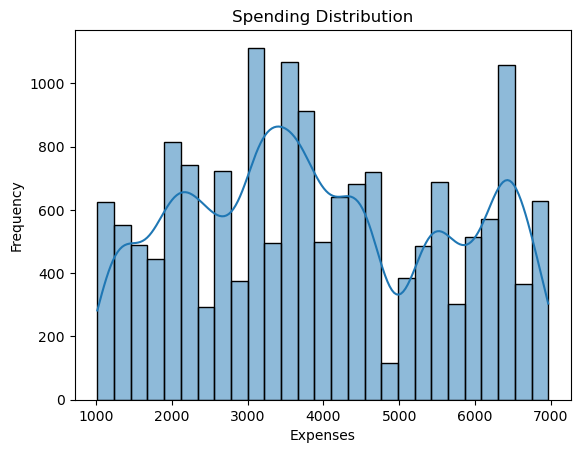

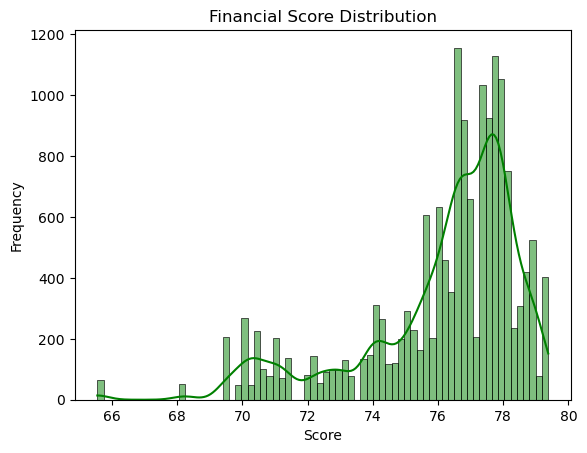

In [30]:
# Spending distribution
sns.histplot(df['Monthly Expenses'], kde=True)
plt.title('Spending Distribution')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()

# Financial scores
sns.histplot(df['Financial_Score'], kde=True, color='green')
plt.title('Financial Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Family-wise scores (assuming 'Family_ID' column exists)
#family_scores = df.groupby('Family ID')['Financial_Score'].mean().reset_index()
#sns.barplot(x='Family ID', y='Financial_Score', df=family_scores)
#plt.title('Family-Wise Financial Scores')
#plt.xlabel('Family ID')
#plt.ylabel('Average Score')
#plt.xticks(rotation=45)
#plt.show() 
# i was getting error here


In [31]:
app = Flask(__name__)

@app.route('/score', methods=['POST'])
def calculate_score():
    # Get data from request
    input_data = request.get_json()

    # Process input data
    df = pd.DataFrame([input_data])
    df['Savings'] = df['Income'] - df['Expenses']
    df['Savings_to_Income'] = df['Savings'] / df['Income']
    df['Expense_to_Income'] = df['Expenses'] / df['Income']
    df['Loan_to_Income'] = df['Loan Payments'] / df['Income']

    # Calculate score
    df['Financial_Score'] = df.apply(calculate_financial_score, axis=1)

    # Create response
    response = {
        "Financial_Score": df['Financial_Score'].iloc[0],
        "Insights": "Savings are below recommended levels" if df['Savings_to_Income'].iloc[0] < 0.2 else "Good financial health"
    }
    return jsonify(response)

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\abhis\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [32]:
from flask import Flask

app = Flask(__name__)

@app.route("/")
def home():
    return "Flask is running!"

if __name__ == "__main__":
    # Explicitly disable the reloader when running in Jupyter
    app.run(debug=True, use_reloader=False)



 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
